# Advanced Lane Detection Pipeline
## import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utilities import thresholds
from utilities import image_utility
from utilities import calibration
from utilities import finder

## Load the camera calibration

In [2]:
c = calibration.CameraCalibration()
c.load_calibration('././camera_cal/')

## Read the image and undistorted base on the camera calibration

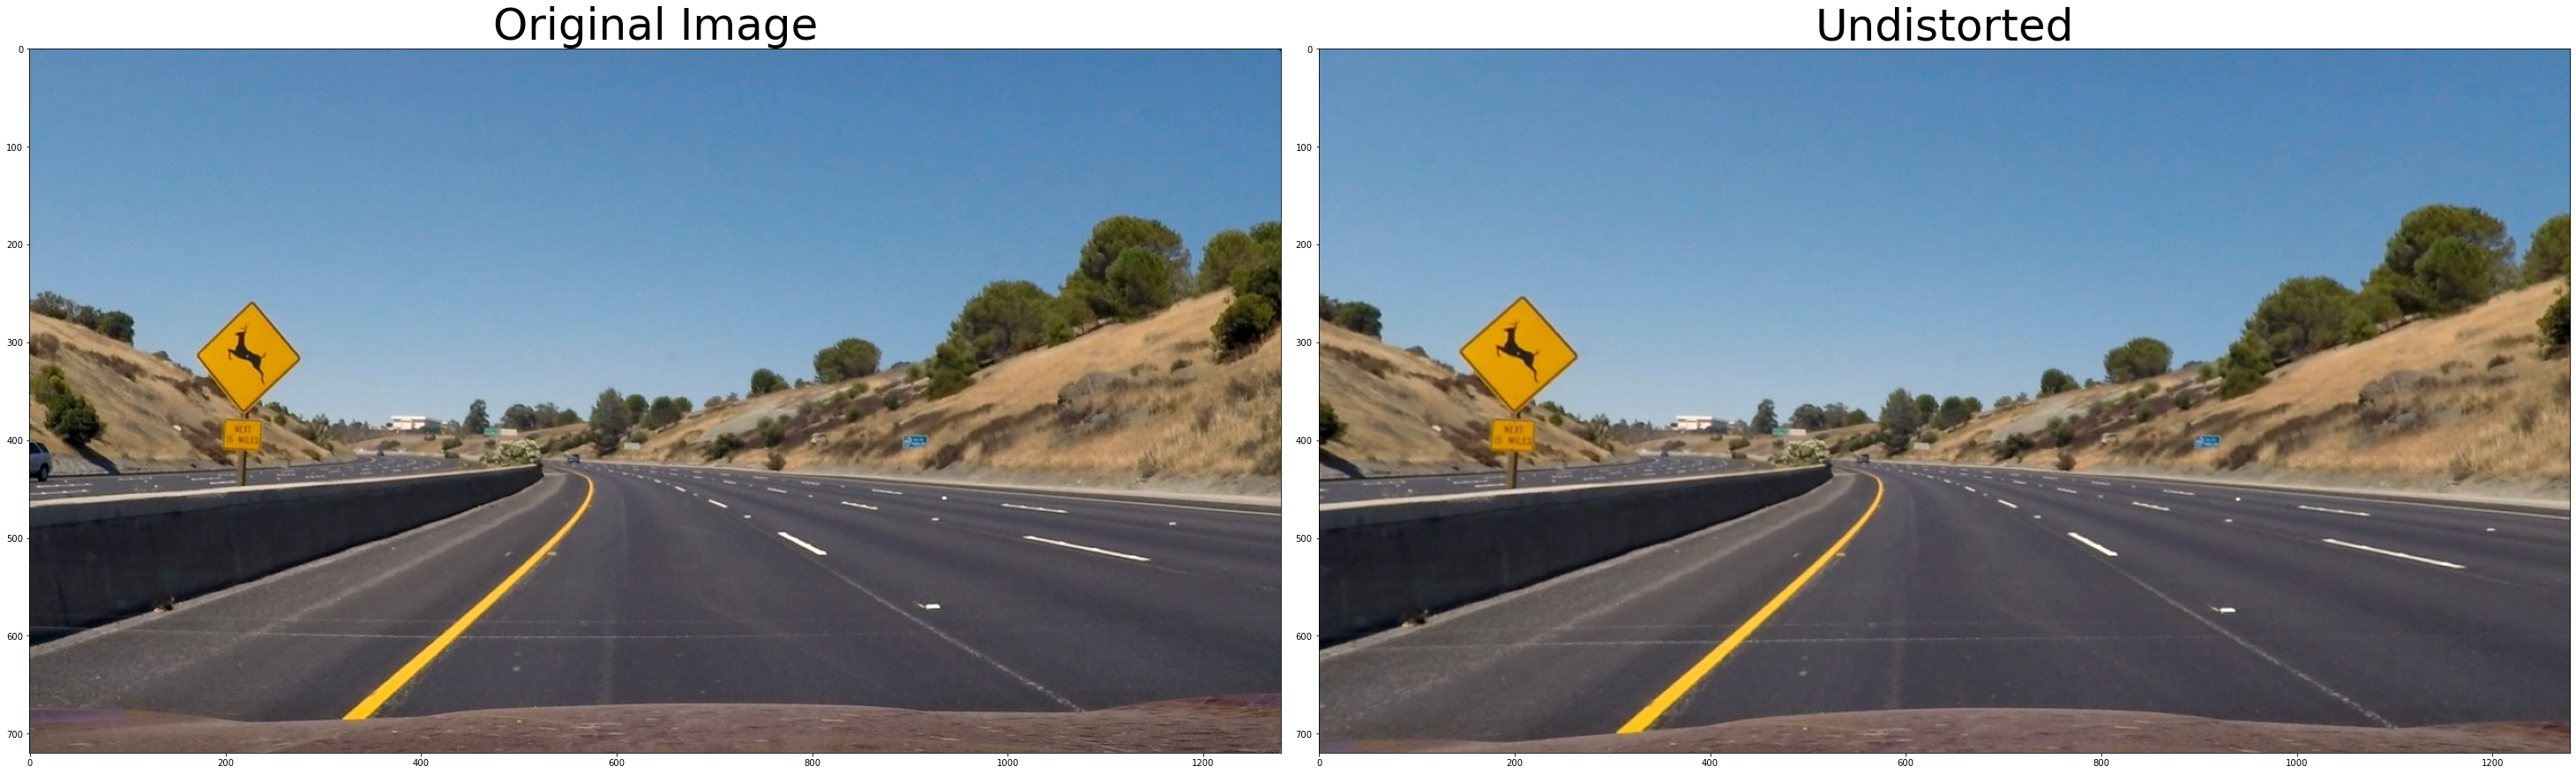

In [3]:
img = cv2.imread('test_images/test2.jpg')
undistort =c.undistort_image(img)
# Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undistort,cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Warp the image to see it on bird view and detect the lanes
Using the sobel algorithm to find the derivates and gradients, also use the hsv color space to avoid having issues between yellow and white lanes.

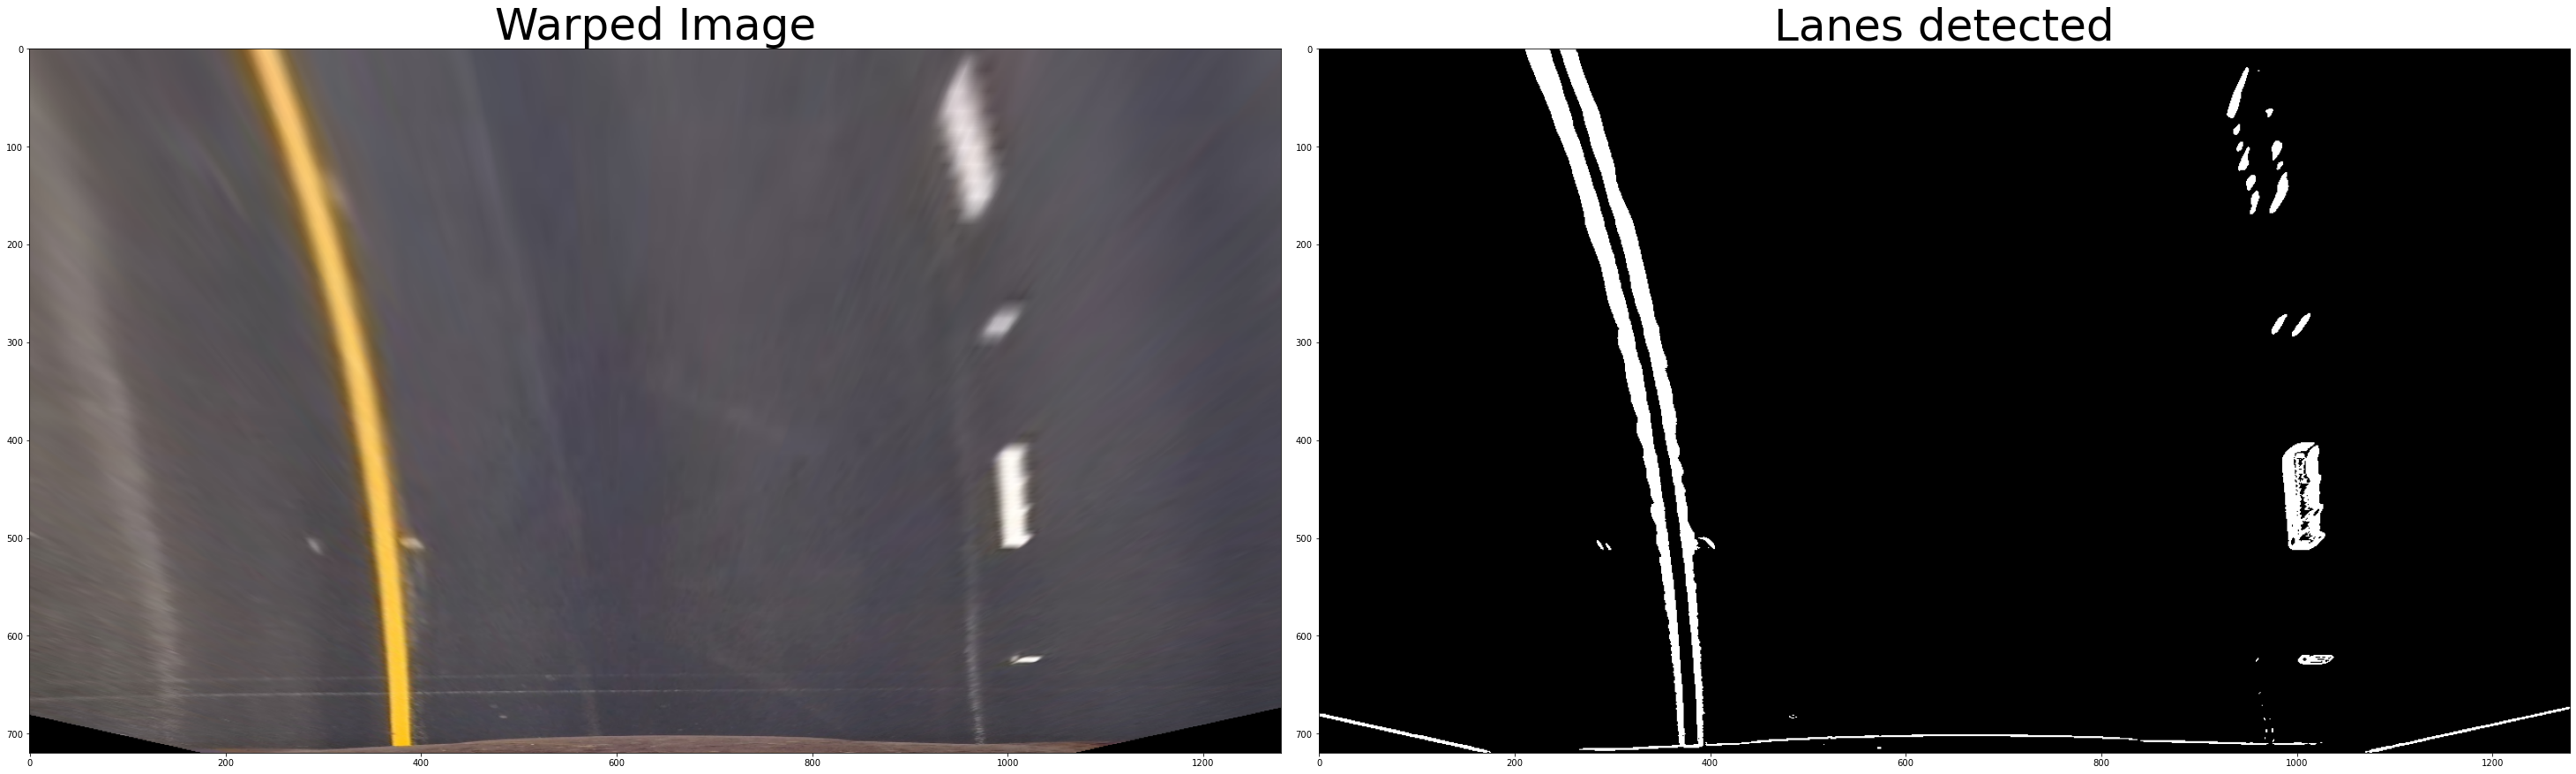

In [4]:
warped, reverse = image_utility.warp_image(undistort,140,470,100)
combined_binary = thresholds.highlight_features(warped,7,(50,150),(50,200),(0.5,np.pi/2),(80,200))

# Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
f.tight_layout()
ax1.imshow(cv2.cvtColor(warped,cv2.COLOR_BGR2RGB))
ax1.set_title('Warped Image', fontsize=50)
ax2.imshow(combined_binary,cmap='gray')
ax2.set_title('Lanes detected', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Calculate the histogram to find where the lanes are located

In [1]:
hist = image_utility.calculate_histogram(combined_binary)
plt.plot(hist)

NameError: name 'image_utility' is not defined

## Find the lanes using sliding windows
- The lanes are found, left and right are colour differently
- The windows are drawn
- The curvatures are calculated, both real and pixels

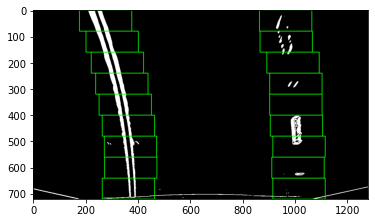

In [5]:
l = finder.LaneFinder()
left_x, left_y, right_x, right_y = l.find_lanes_windows(combined_binary)
plt.imshow(l.inspection_image)

## Color the left and right lanes

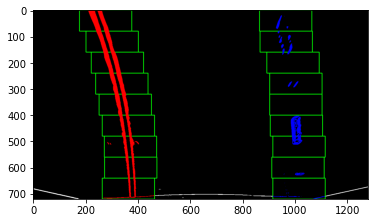

In [13]:
res, plot_y, left_fit_x, right_fit_x,left_fit,right_fit = l.plot_polylines(combined_binary)
plt.imshow(l.inspection_image)

## Calculate Curvature and car offset

In [16]:
real_curvature = image_utility.measure_curvature_real(plot_y,left_fit,right_fit)
pos = image_utility.measure_vehicle_distance(img.shape[0], img.shape[1], left_fit, right_fit)
print(f'Left: {real_curvature[0]:.2f}mts Right:{real_curvature[1]:.2f}mts Offset:{pos:.2f}mts')

Left: 2172.58mts Right:2905.79mts Offset:-0.27mts


In [9]:
result_img = l.search_around_polylines(combined_binary)
plt.imshow(result_img)

##  Plot the result on the original image
Finally we reverse the image and blend on top of the original image

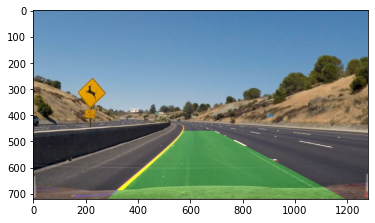

In [11]:
result = image_utility.reverse_warp(img, result_img,reverse,(img.shape[1],img.shape[0]),0.3)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))